<a href="https://colab.research.google.com/github/Piyush94-BA/Credit-Risk-Modelling/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Loading of important packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df0=pd.read_excel('Risk Analytics Assignment-2.xlsx', sheet_name='Data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration (EDA)

In [ ]:
df0.head()

,Cust_Id,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Hyderabad,22,0,4425000,RENT,123.0,PERSONAL,D,2625000,16.02,1,Y,3
1,2,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
2,3,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
3,4,Hyderabad,23,1,4912500,RENT,4.0,MEDICAL,C,2625000,15.23,1,N,2
4,5,Delhi,24,1,4080000,RENT,8.0,MEDICAL,C,2625000,14.27,1,Y,4


In [ ]:
df0.shape

(32581, 14)

In [ ]:
# Dropping Cust_Id as it will not be required in analysis and modelling
df=df0.drop(['Cust_Id'],axis=1)

In [ ]:
df.head()

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,Hyderabad,22,0,4425000,RENT,123.0,PERSONAL,D,2625000,16.02,1,Y,3
1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
3,Hyderabad,23,1,4912500,RENT,4.0,MEDICAL,C,2625000,15.23,1,N,2
4,Delhi,24,1,4080000,RENT,8.0,MEDICAL,C,2625000,14.27,1,Y,4


In [ ]:
df.shape

(32581, 13)

In [ ]:
df.describe()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History
count,32581.000000,32581.000000,3.258100e+04,31686.000000,3.258100e+04,29465.000000,32581.000000,32581.000000
mean,27.734600,0.500599,4.955614e+06,4.789686,7.192028e+05,11.011695,0.218164,5.804211
std,6.348078,0.500007,4.648734e+06,4.142630,4.741565e+05,3.240459,0.413006,4.055001
min,20.000000,0.000000,3.000000e+05,0.000000,3.750000e+04,5.420000,0.000000,2.000000
25%,23.000000,0.000000,2.887500e+06,2.000000,3.750000e+05,7.900000,0.000000,3.000000
50%,26.000000,1.000000,4.125000e+06,4.000000,6.000000e+05,10.990000,0.000000,4.000000
75%,30.000000,1.000000,5.940000e+06,7.000000,9.150000e+05,13.470000,0.000000,8.000000
max,144.000000,1.000000,4.500000e+08,123.000000,2.625000e+06,23.220000,1.000000,30.000000


In [ ]:
df.columns

Index(['Location', 'Age', 'Car Ownership', 'Income', 'Home Type',
       'Job Experience', 'Loan Purpose', 'Loan Grade', 'Loan Balance',
       'Interest Rate', 'loan_status', 'Default History', 'Credit History'],
      dtype='object')

### Univariate Analysis

In [ ]:
#Checking if the target variable is balanced or not
df.value_counts("loan_status") #Imbalanced data

loan_status
0    25473
1     7108
dtype: int64

In [ ]:
#Percentage of classes in target variable
# Normalize can be set to True to print proportions instead of number 
df['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

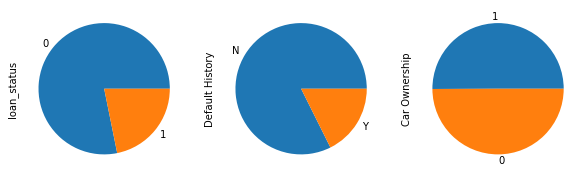

In [ ]:
#Plotting the distribution of the classes in categorical variables Loan_status, Default History, Car Ownership
plt.figure(1)
plt.subplot(131)
df['loan_status'].value_counts(normalize=True).plot.pie(figsize=(10,10))

plt.subplot(132)
df["Default History"].value_counts(normalize=True).plot.pie()

plt.subplot(133)
df['Car Ownership'].value_counts(normalize=True).plot.pie()

plt.show()

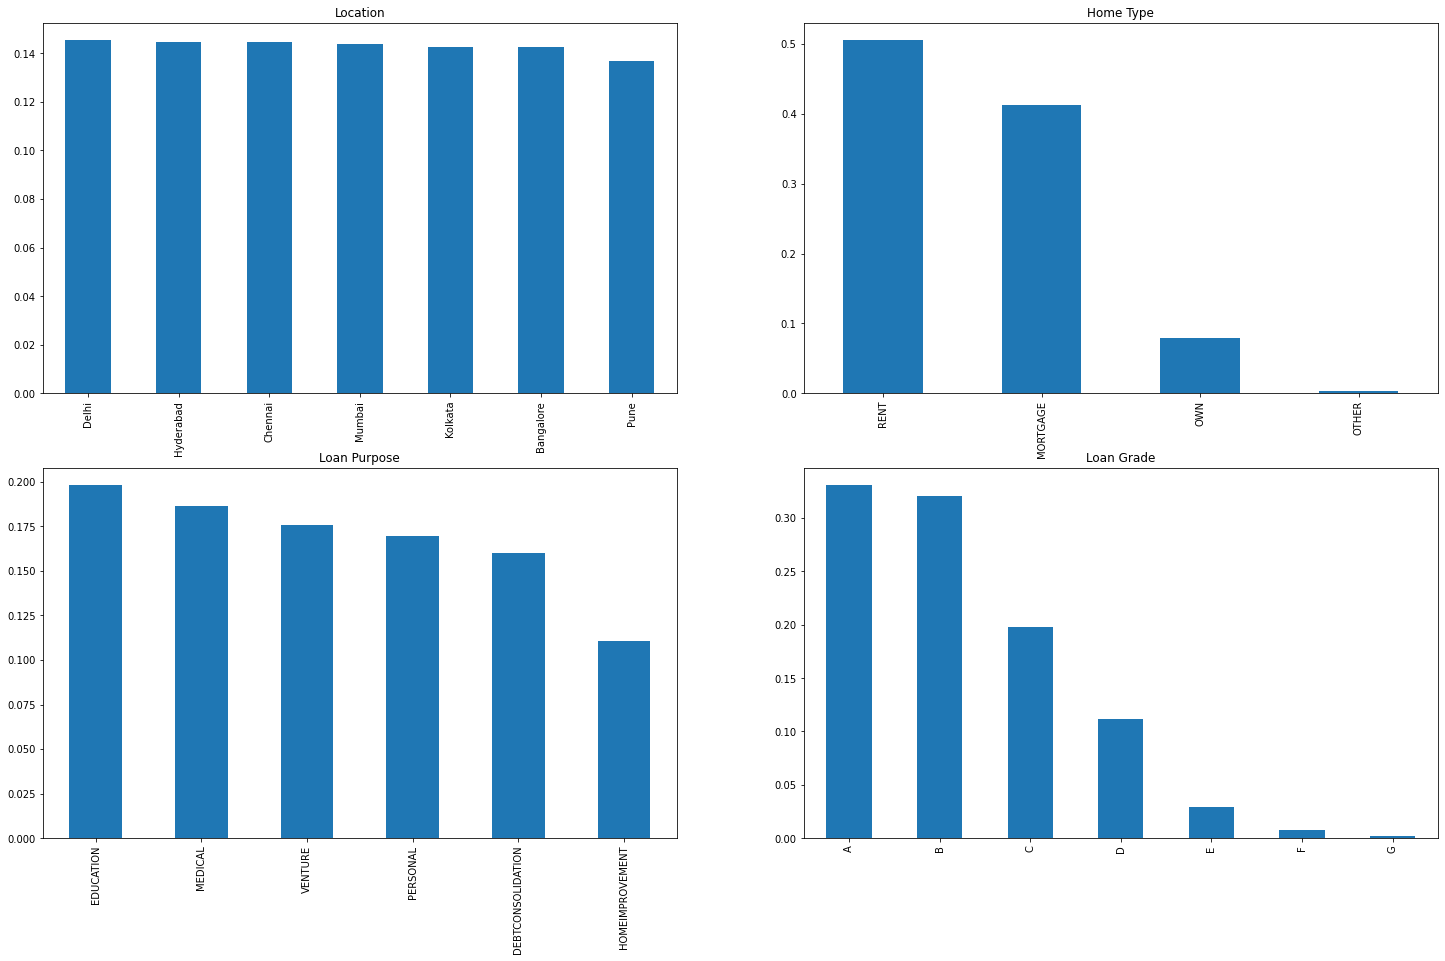

In [ ]:
#Plotting the distribution of classes in categorical variables Location, Home Type, Loan Purpose & Loan Grade
plt.figure(1)
plt.subplot(221)
df['Location'].value_counts(normalize=True).plot.bar(figsize=(25,15), title= 'Location')

plt.subplot(222)
df['Home Type'].value_counts(normalize=True).plot.bar(title= 'Home Type')

plt.subplot(223)
df['Loan Purpose'].value_counts(normalize=True).plot.bar(title= 'Loan Purpose')

plt.subplot(224)
df['Loan Grade'].value_counts(normalize=True).plot.bar(title= 'Loan Grade')

plt.show()

### Bivariate Analysis



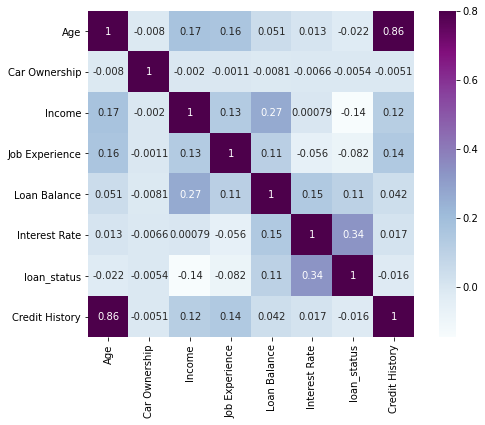

In [ ]:
# Correlation Matrix to understand the correlation of continuous variables in the data set
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True)

# Observations

# Age has high correlation with Credit History

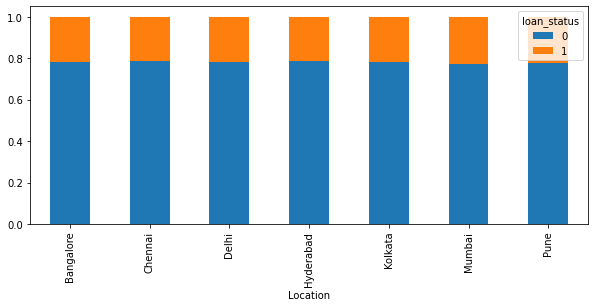

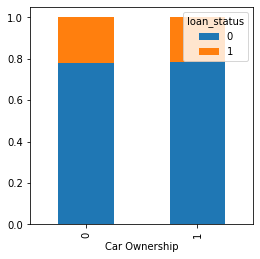

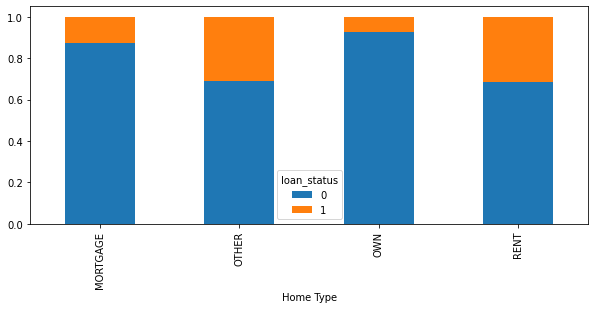

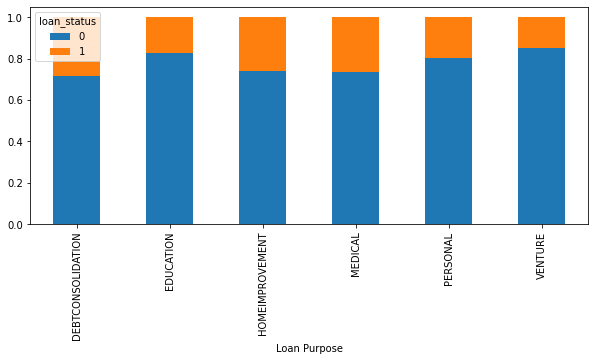

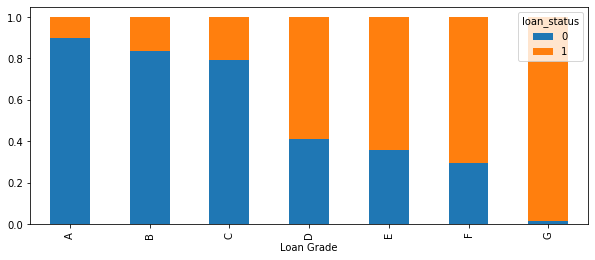

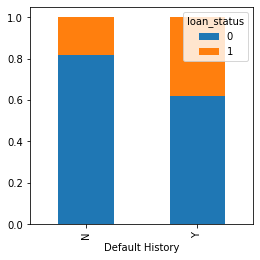

In [ ]:
#Plotting the distribution of binary classes of loan_status in categorigal variables Location, Car Ownership, Home Type, Loan Purpose, Loan Grade, Default History.

location=pd.crosstab(df['Location'],df['loan_status'])
car_ownership=pd.crosstab(df['Car Ownership'],df['loan_status'])
home_type=pd.crosstab(df['Home Type'],df['loan_status'])
loan_Purpose=pd.crosstab(df['Loan Purpose'],df['loan_status'])
loan_grade=pd.crosstab(df['Loan Grade'],df['loan_status'])
default_history=pd.crosstab(df['Default History'],df['loan_status'])

location.div(location.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()
car_ownership.div(car_ownership.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
home_type.div(home_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()
loan_Purpose.div(loan_Purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()
loan_grade.div(loan_grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()
default_history.div(default_history.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

# Observations from the below graphs

# 1) Default in all locations are almost same
# 2) Loan default is almost same when the person has car or not
# 3) Default is less for "own" and "mortgage" homes compared to others
# 4) Default in Venture and Education purpose loans are less compared to others
# 5) Loan default is increasing with loan grades from A to G

### One Hot Encoding for Categorical Variables

In [ ]:

df=pd.get_dummies(df)
df.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Pune,Home Type_MORTGAGE,Home Type_OTHER,Home Type_OWN,Home Type_RENT,Loan Purpose_DEBTCONSOLIDATION,Loan Purpose_EDUCATION,Loan Purpose_HOMEIMPROVEMENT,Loan Purpose_MEDICAL,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default History_N,Default History_Y
0,22,0,4425000,123.0,2625000,16.02,1,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,21,1,720000,5.0,75000,11.14,0,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,1,720000,1.0,412500,12.87,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,1,4912500,4.0,2625000,15.23,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,1,4080000,8.0,2625000,14.27,1,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#df0.columns
df.columns

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'loan_status', 'Credit History', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Home Type_MORTGAGE', 'Home Type_OTHER', 'Home Type_OWN',
       'Home Type_RENT', 'Loan Purpose_DEBTCONSOLIDATION',
       'Loan Purpose_EDUCATION', 'Loan Purpose_HOMEIMPROVEMENT',
       'Loan Purpose_MEDICAL', 'Loan Purpose_PERSONAL', 'Loan Purpose_VENTURE',
       'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D',
       'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G', 'Default History_N',
       'Default History_Y'],
      dtype='object')

# Data Preprocessing

### 1) Missing Value Imputation : Technique Used is KNN Imputation

In [ ]:
# Number of missing values in each column
#Missing data in columns Job Experience and Interest Rate
df.isnull().sum()

Age                                  0
Car Ownership                        0
Income                               0
Job Experience                     895
Loan Balance                         0
Interest Rate                     3116
loan_status                          0
Credit History                       0
Location_Bangalore                   0
Location_Chennai                     0
Location_Delhi                       0
Location_Hyderabad                   0
Location_Kolkata                     0
Location_Mumbai                      0
Location_Pune                        0
Home Type_MORTGAGE                   0
Home Type_OTHER                      0
Home Type_OWN                        0
Home Type_RENT                       0
Loan Purpose_DEBTCONSOLIDATION       0
Loan Purpose_EDUCATION               0
Loan Purpose_HOMEIMPROVEMENT         0
Loan Purpose_MEDICAL                 0
Loan Purpose_PERSONAL                0
Loan Purpose_VENTURE                 0
Loan Grade_A             

In [ ]:
#Importing KNNImputer for imputation of missing data
from sklearn.impute import KNNImputer

In [ ]:
#columns=df0.columns.tolist()
columns=df.columns.tolist()

In [ ]:
# Missing value imputation using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
#df0=imputer.fit_transform(df0)
df=imputer.fit_transform(df)

In [ ]:
# Converting df to dataframe as it has changed to array after KNN Imputation
df=pd.DataFrame(df,columns=columns)
df2=pd.DataFrame(df,columns=columns)

In [ ]:
df2.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Pune,Home Type_MORTGAGE,Home Type_OTHER,Home Type_OWN,Home Type_RENT,Loan Purpose_DEBTCONSOLIDATION,Loan Purpose_EDUCATION,Loan Purpose_HOMEIMPROVEMENT,Loan Purpose_MEDICAL,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default History_N,Default History_Y
0,22.0,0.0,4425000.0,123.0,2625000.0,16.02,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,1.0,720000.0,5.0,75000.0,11.14,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,1.0,720000.0,1.0,412500.0,12.87,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23.0,1.0,4912500.0,4.0,2625000.0,15.23,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24.0,1.0,4080000.0,8.0,2625000.0,14.27,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df2.info()

# All the missing values have been imputed with KNN imputation leaving no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             32581 non-null  float64
 1   Car Ownership                   32581 non-null  float64
 2   Income                          32581 non-null  float64
 3   Job Experience                  32581 non-null  float64
 4   Loan Balance                    32581 non-null  float64
 5   Interest Rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  float64
 7   Credit History                  32581 non-null  float64
 8   Location_Bangalore              32581 non-null  float64
 9   Location_Chennai                32581 non-null  float64
 10  Location_Delhi                  32581 non-null  float64
 11  Location_Hyderabad              32581 non-null  float64
 12  Location_Kolkata                

### 2) Outlier Analyisis


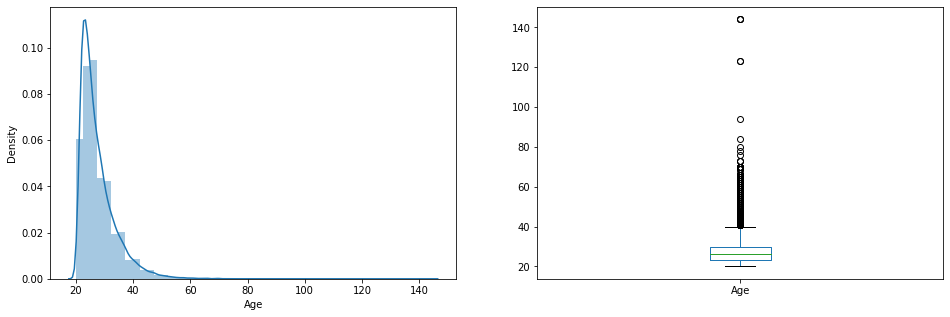

In [ ]:
#Checking the distribution of column Age. The data is severely right skewed
plt.figure(1)
plt.subplot(121)
sns.distplot(df2['Age']);

plt.subplot(122)
df2['Age'].plot.box(figsize=(16,5))

plt.show()

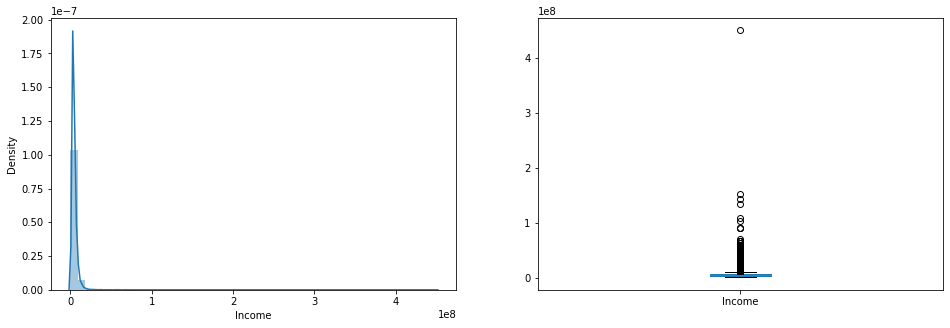

In [ ]:
#Checking the distribution of column Income. The data is severely right skewed
plt.figure(1)
plt.subplot(121)
sns.distplot(df2['Income']);

plt.subplot(122)
df2['Income'].plot.box(figsize=(16,5))

plt.show()

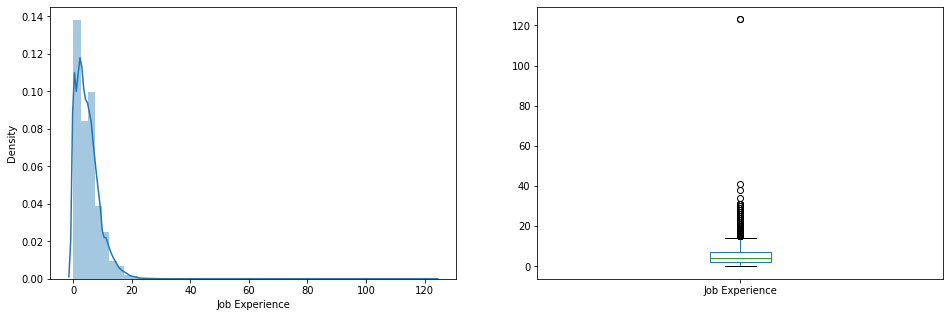

In [ ]:
#Checking the distribution of column Job Experience. The data is severely right skewed
plt.figure(1)
plt.subplot(121)
sns.distplot(df2['Job Experience']);

plt.subplot(122)
df2['Job Experience'].plot.box(figsize=(16,5))

plt.show()

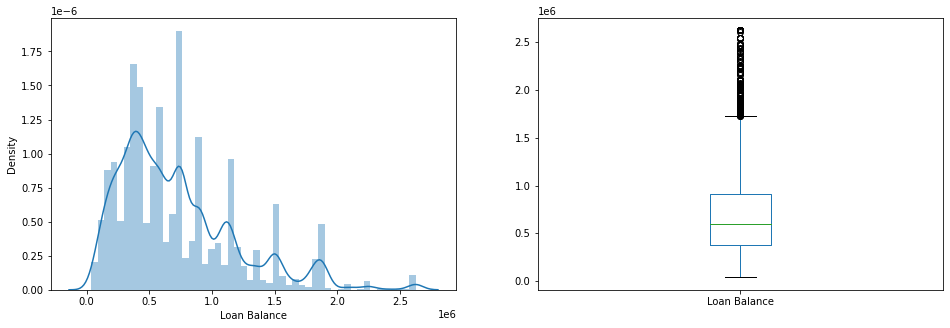

In [ ]:
#Checking the distribution of Loan Balance
plt.figure(1)
plt.subplot(121)
sns.distplot(df2['Loan Balance']);

plt.subplot(122)
df2['Loan Balance'].plot.box(figsize=(16,5))

plt.show()

### 3) Scaling of features 

In [ ]:
# Creating two data frames for predictors and target variables

X = df2.drop('loan_status',1)  ## X consitsts predictors   loan_status 
y = df2.loan_status            ##y consists target variable
#X=pd.get_dummies(df2)

In [ ]:
#Scaling the predictors using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


scaled_features = scaler.transform(X)

scaled_features

df2= pd.DataFrame(scaled_features,columns=X.columns)

In [ ]:
print(df2.head())
print(df2.columns)

        Age  Car Ownership  ...  Default History_N  Default History_Y
0 -0.903374      -1.001198  ...          -2.161294           2.161294
1 -1.060904       0.998804  ...           0.462686          -0.462686
2 -0.430783       0.998804  ...           0.462686          -0.462686
3 -0.745843       0.998804  ...           0.462686          -0.462686
4 -0.588313       0.998804  ...          -2.161294           2.161294

[5 rows x 33 columns]
Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'Credit History', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Home Type_MORTGAGE', 'Home Type_OTHER', 'Home Type_OWN',
       'Home Type_RENT', 'Loan Purpose_DEBTCONSOLIDATION',
       'Loan Purpose_EDUCATION', 'Loan Purpose_HOMEIMPROVEMENT',
       'Loan Purpose_MEDICAL', 'Loan Purpose_PERSONAL', 'Loan Purpose_VENTURE',
       'Loan Grade_

In [ ]:
df2.columns

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'Credit History', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Home Type_MORTGAGE', 'Home Type_OTHER', 'Home Type_OWN',
       'Home Type_RENT', 'Loan Purpose_DEBTCONSOLIDATION',
       'Loan Purpose_EDUCATION', 'Loan Purpose_HOMEIMPROVEMENT',
       'Loan Purpose_MEDICAL', 'Loan Purpose_PERSONAL', 'Loan Purpose_VENTURE',
       'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D',
       'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G', 'Default History_N',
       'Default History_Y'],
      dtype='object')

In [ ]:
df2.shape

(32581, 33)

# Predicting Probability of Default (PD) - Model Selection and Fine Tuning

####Train Test Spilt

In [ ]:
##80/20 train  set and validation set spilt is done
##for uniform distribution of target variable in train set  and validation set  stratify=y is used##
# Train Test Split of Scaled Variables
x1_train, x1_cv, y1_train, y1_cv = train_test_split(df2,y,
                                                    test_size=0.20,random_state=101,stratify=y)

####Over Sampling to manage unbalanced Target Class using SMOTE ##

In [ ]:
##Here Traget variable is Intially  Imbalance   (21% -1(Yes) Vs 79%-0(No) )
##Over Sampling of "No" target clase used to manage imbalance
##After Over Sampling of "Yes" class is balance   (50% -1(Yes) Vs 50%-0(No))
##Over Sampled data is used for further Analysis

print("Before OverSampling, counts of label '1': {}".format(sum(y1_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y1_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x1_train, y1_train = sm.fit_sample(x1_train, y1_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x1_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y1_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y1_train == 0))) 

Before OverSampling, counts of label '1': 5686
Before OverSampling, counts of label '0': 20378 

After OverSampling, the shape of train_X: (40756, 33)
After OverSampling, the shape of train_y: (40756,) 

After OverSampling, counts of label '1': 20378
After OverSampling, counts of label '0': 20378


### Model Creation and Selection

#### 1) Logistic Regression

In [ ]:
#Creating a logistic regresion model with default threshold cutoff of 0.50
## 78 % accuracy achieved on TEST DATA

from sklearn.metrics import accuracy_score

lr1 = LogisticRegression(random_state=0)
lr1.fit(x1_train, y1_train)
pred_cv1 = lr1.predict(x1_cv)
pred_cv_prob1 = lr1.predict_proba(x1_cv)
accuracy_score(y1_cv,pred_cv1)
print(pred_cv1)
print(pred_cv_prob1[:,1])
from sklearn.metrics import confusion_matrix 
cm1 = confusion_matrix(y1_cv,pred_cv1) 
print(cm1)
print(classification_report(y1_cv,pred_cv1))

[0. 1. 1. ... 1. 0. 0.]
[0.35629906 0.86782549 0.60220513 ... 0.7273014  0.1315996  0.15784744]
[[3957 1138]
 [ 298 1124]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      5095
         1.0       0.50      0.79      0.61      1422

    accuracy                           0.78      6517
   macro avg       0.71      0.78      0.73      6517
weighted avg       0.84      0.78      0.79      6517



(0.0, 1.0)

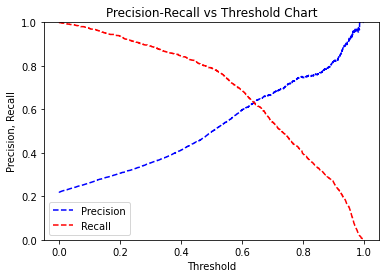

In [ ]:
#Creating the Precision-Recall curve to find out the optimal value of threshold. Graph shows optimal value at around 0.60

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y1_cv, pred_cv_prob1[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
# logistic reg prediction on train data
cm1_train = confusion_matrix(y1_train,lr1.predict(x1_train))
print(cm1_train)
print(classification_report(y1_train,lr1.predict(x1_train)))

[[16053  4325]
 [ 4032 16346]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     20378
         1.0       0.79      0.80      0.80     20378

    accuracy                           0.79     40756
   macro avg       0.80      0.79      0.79     40756
weighted avg       0.80      0.79      0.79     40756



In [ ]:
## changing threshold cutoff to 55%
##Achieved 81% on test data. However, the recall and precision dropped significantly.

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import binarize
lr2 = LogisticRegression(random_state=0)
lr2.fit(x1_train, y1_train)
#pred_cv1 = model1.predict(x1_cv)
pred_cv_prob2 = lr2.predict_proba(x1_cv)[:,1]
pred_cv_prob055 = binarize([pred_cv_prob2], 0.55)
#print(pred_cv_prob065[0])
accuracy_score(y1_cv,pred_cv_prob055[0])
print(pred_cv_prob055[0])
#print(pred_cv_prob2[:,1])
from sklearn.metrics import confusion_matrix 
cm2 = confusion_matrix(y1_cv,pred_cv_prob055[0]) 
print(cm2)
print(classification_report(y1_cv,pred_cv_prob055[0]))

[0. 1. 1. ... 1. 0. 0.]
[[4208  887]
 [ 366 1056]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      5095
         1.0       0.54      0.74      0.63      1422

    accuracy                           0.81      6517
   macro avg       0.73      0.78      0.75      6517
weighted avg       0.84      0.81      0.82      6517



In [ ]:
# roc auc score for 0.55 cutoff
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y1_cv,pred_cv_prob055[0]))

0.7842618932269991


In [ ]:
# roc auc score for 0.5 cutoff
print(roc_auc_score(y1_cv,pred_cv_prob1[:,1]))

0.8494447964069459


In [ ]:
# Importing necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from inspect import signature
from sklearn import metrics

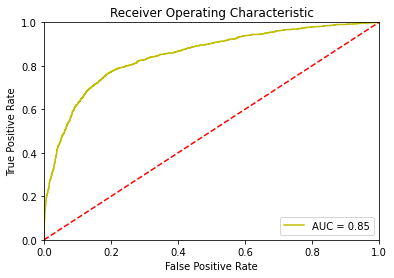

In [ ]:
# ROC Curve for 0.50 threshold
fpr,tpr,thresholds = roc_curve(y1_cv,pred_cv_prob2)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 2) Decision Trees

In [ ]:
##decision tree
## Accuracy of 0.85 achieved on test data
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x1_train, y1_train)

predictions = dtree.predict(x1_cv)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y1_cv,predictions))

print(confusion_matrix(y1_cv,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      5095
         1.0       0.62      0.76      0.69      1422

    accuracy                           0.85      6517
   macro avg       0.78      0.82      0.79      6517
weighted avg       0.86      0.85      0.85      6517

[[4443  652]
 [ 337 1085]]


#### 3) Random Forest

In [ ]:
# random forest
#Achieved accuracy of 91% on test data
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x1_train, y1_train)
y1_pred=rf_clf.predict(x1_cv)
confusion_matrix(y1_cv, rf_clf.predict(x1_cv))
print(confusion_matrix(y1_cv,y1_pred))
print(classification_report(y1_cv,y1_pred))

[[4889  206]
 [ 383 1039]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      5095
         1.0       0.83      0.73      0.78      1422

    accuracy                           0.91      6517
   macro avg       0.88      0.85      0.86      6517
weighted avg       0.91      0.91      0.91      6517



In [ ]:
# random forest train data prediction
#Achieving accuracy of 100% on train data. Case of extreme overfitting
y1_pred_train=rf_clf.predict(x1_train)
confusion_matrix(y1_train, rf_clf.predict(x1_train))
print(confusion_matrix(y1_train,y1_pred_train))
print(classification_report(y1_train,y1_pred_train))

[[20378     0]
 [    0 20378]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20378
         1.0       1.00      1.00      1.00     20378

    accuracy                           1.00     40756
   macro avg       1.00      1.00      1.00     40756
weighted avg       1.00      1.00      1.00     40756



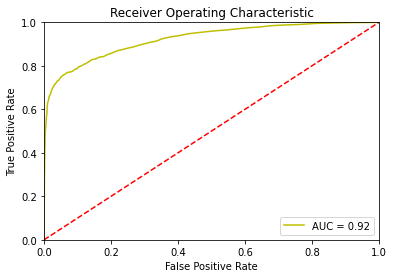

In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y1_cv,rf_clf.predict_proba(x1_cv)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
x1_train

                                importance
feature                                   
Income                               0.188
Interest Rate                        0.115
Loan Balance                         0.109
Job Experience                       0.069
Home Type_RENT                       0.059
Credit History                       0.058
Age                                  0.057
Loan Grade_D                         0.047
Home Type_MORTGAGE                   0.041
Car Ownership                        0.030
Loan Grade_A                         0.023
Loan Grade_C                         0.018
Home Type_OWN                        0.017
Loan Purpose_MEDICAL                 0.015
Loan Purpose_DEBTCONSOLIDATION       0.014
Loan Purpose_HOMEIMPROVEMENT         0.014
Loan Purpose_VENTURE                 0.012
Loan Grade_B                         0.012
Loan Purpose_EDUCATION               0.012
Loan Grade_E                         0.011
Loan Purpose_PERSONAL                0.009
Default His

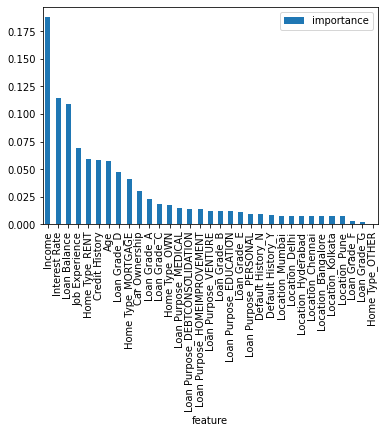

In [ ]:
#Feature Importance is derived

##Top 5 important feature -Income,Interest Rate,Loan Balance ,Job Experience,Home Type_RENT ##

x1_train_df= pd.DataFrame(x1_train,columns=X.columns)
importances = pd.DataFrame({'feature':x1_train_df.columns,'importance':np.round(rf_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar()

In [ ]:
df2.shape

(32581, 33)

#### Final Model Selection - Logistic Regression

The Logistic regression model with a threshold of 0.50 was chosen as the best model. The reasons are mentioned below:

1. The accuracy, recall and precision were in the same range for both the test and train data.
2. Accuracy on test data = 0.79, AUC = 0.85, recall = 0.78, precision = 0.71
3. Random Forest model could have been chosen, but was dropped becuase of extreme case of overfitting 

In [ ]:
prediction_D = lr1.predict(df2)
prediction_D_PROBA = lr1.predict_proba(df2)

In [ ]:
# going with logistic regression predicted values and default cutoff 0.5
#Creating a new data frame with the predicted probability of defaults\
final=pd.concat((df0['Cust_Id'],pd.Series(prediction_D_PROBA[:,1]),pd.Series(prediction_D)),axis=1)
final.columns= ['Cust_Id','prob_of_default','binary_prob_of_default']
final.tail()

,Cust_Id,prob_of_default,binary_prob_of_default
32576,32577,0.192444,0.0
32577,32578,0.036982,0.0
32578,32579,0.887715,1.0
32579,32580,0.013158,0.0
32580,32581,0.415900,0.0


#Working on EAD model

In [ ]:
df.head(2)

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Pune,Home Type_MORTGAGE,Home Type_OTHER,Home Type_OWN,Home Type_RENT,Loan Purpose_DEBTCONSOLIDATION,Loan Purpose_EDUCATION,Loan Purpose_HOMEIMPROVEMENT,Loan Purpose_MEDICAL,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default History_N,Default History_Y
0,22.0,0.0,4425000.0,123.0,2625000.0,16.02,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,1.0,720000.0,5.0,75000.0,11.14,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.columns

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'loan_status', 'Credit History', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Home Type_MORTGAGE', 'Home Type_OTHER', 'Home Type_OWN',
       'Home Type_RENT', 'Loan Purpose_DEBTCONSOLIDATION',
       'Loan Purpose_EDUCATION', 'Loan Purpose_HOMEIMPROVEMENT',
       'Loan Purpose_MEDICAL', 'Loan Purpose_PERSONAL', 'Loan Purpose_VENTURE',
       'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D',
       'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G', 'Default History_N',
       'Default History_Y'],
      dtype='object')

In [ ]:
df.shape

(32581, 34)

In [ ]:
x = df.drop(columns=['Loan Balance'], axis=1)
y = df[['Loan Balance']]

In [ ]:
x_train.columns

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Interest Rate',
       'Credit History', 'Location_Bangalore', 'Location_Chennai',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Home Type_MORTGAGE',
       'Home Type_OTHER', 'Home Type_OWN', 'Home Type_RENT',
       'Loan Purpose_DEBTCONSOLIDATION', 'Loan Purpose_EDUCATION',
       'Loan Purpose_HOMEIMPROVEMENT', 'Loan Purpose_MEDICAL',
       'Loan Purpose_PERSONAL', 'Loan Purpose_VENTURE', 'Loan Grade_A',
       'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D', 'Loan Grade_E',
       'Loan Grade_F', 'Loan Grade_G', 'Default History_N',
       'Default History_Y'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=99)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

from sklearn.metrics import r2_score

print('Training R2 score: ', r2_score(y_train, y_train_pred))
print('Testing R2 score: ', r2_score(y_test, y_test_pred))

Training R2 score:  0.12540363183729542
Testing R2 score:  0.1520436632426423


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200)

rf.fit(x_train, y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

print('Training R2 score: ', r2_score(y_train, y_train_pred_rf))
print('Testing R2 score: ', r2_score(y_test, y_test_pred_rf))

Training R2 score:  0.905372370473698
Testing R2 score:  0.30819888174742327


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(x_train, y_train)

y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

print('Training R2 score: ', r2_score(y_train, y_train_pred_xgb))
print('Testing R2 score: ', r2_score(y_test, y_test_pred_xgb))

[17:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training R2 score:  0.316698399470682
Testing R2 score:  0.2969637639088494


For EAD model, we are going with RandomForestRegressor model

# LGD Model

For LGD, as neither recovery rate is given nor actual funded amount, so we assumed LGD as two values--50% or 100%

In [ ]:
prediction_EAD= rf.predict(x)

In [ ]:
final=pd.concat((df0['Cust_Id'],pd.Series(prediction_D_PROBA[:,1]),pd.Series(prediction_D),
                pd.Series(prediction_EAD)), axis=1)
final.columns= ['Cust_Id','prob_of_default','binary_prob_of_default','EAD']
final['LGD:0.5']=0.5
final['LGD:1']=1
final['Expected Loss using LGD:0.5']=(final["prob_of_default"]*final["EAD"]*final["LGD:0.5"])
final['Expected Loss using LGD:1']=(final["prob_of_default"]*final["EAD"]*final["LGD:1"])

In [ ]:
final.head()

,Cust_Id,prob_of_default,binary_prob_of_default,EAD,LGD:0.5,LGD:1,Expected Loss using LGD:0.5,Expected Loss using LGD:1
0,1,0.954286,1.0,1117837.500,0.5,1,533368.414252,1.066737e+06
1,2,0.151408,0.0,80025.000,0.5,1,6058.228309,1.211646e+04
2,3,0.712641,1.0,144909.375,0.5,1,51634.180025,1.032684e+05
3,4,0.944873,1.0,965587.500,0.5,1,456178.774047,9.123575e+05
4,5,0.960107,1.0,2020012.500,0.5,1,969713.807185,1.939428e+06


In [ ]:
Total_Expected_loss1= final["Expected Loss using LGD:0.5"].sum()

In [ ]:
Total_Expected_loss2=final["Expected Loss using LGD:1"].sum()

In [ ]:
Total_Expected_loss1

4636980494.356386

In [ ]:
Total_Expected_loss2

9273960988.712772